<a href="https://colab.research.google.com/github/ulianakazak/Bigutochki/blob/main/MultiNLI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_train.jsonl', lines = True)
val_mismatched = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_dev_mismatched.jsonl', lines = True)
val_matched = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_dev_matched.jsonl', lines = True)
test_mismatched = pd.read_json('/content/drive/MyDrive/ snli/multinli_0.9_test_mismatched_unlabeled.jsonl', lines = True)
test_matched = pd.read_json('/content/drive/MyDrive/ snli/multinli_0.9_test_matched_unlabeled.jsonl', lines = True)
full_data = zip([train, val_matched, test_matched, val_mismatched, test_mismatched], ['train', 'val_matched', 'test_matched', 'val_mismatched', 'test_mismatched'])

In [3]:
train.head(3)

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],government,neutral,31193n,31193,Conceptually cream skimming has two basic dime...,( ( Conceptually ( cream skimming ) ) ( ( has ...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,Product and geography are what make cream skim...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...
1,[entailment],telephone,entailment,101457e,101457,you know during the season and i guess at at y...,( you ( ( know ( during ( ( ( the season ) and...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,You lose the things to the following level if ...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...
2,[entailment],fiction,entailment,134793e,134793,One of our number will carry out your instruct...,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,A member of my team will execute your orders w...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...


In [4]:
def gener_label_countplot(data, data_name):
  plot = sns.catplot(x = 'gold_label', col='genre',
                  data=data.sort_values(by =['genre', 'gold_label']),
                  kind="count", height=4, aspect=.8, 
                  palette='winter')
#  plot.set_xticklabels(["contraduction", "neutral", "entailment"])
  plot.fig.suptitle(f'Распределение лейблов по жанрам в {data_name}',  fontsize=18, y=1.05)
  plt.show()

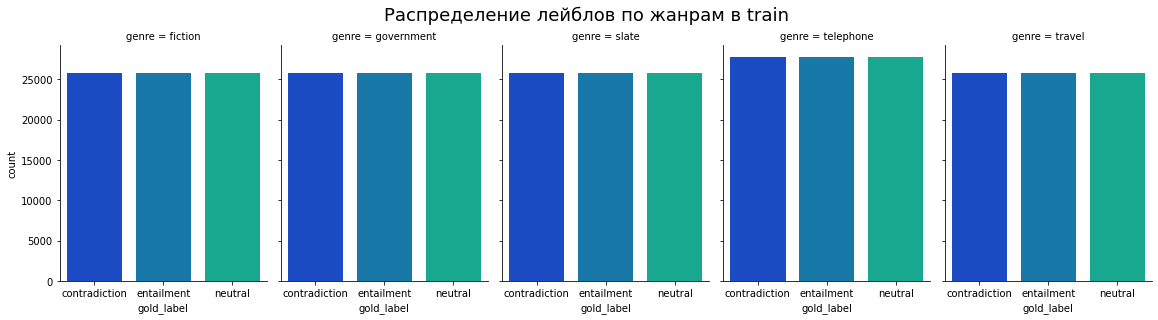

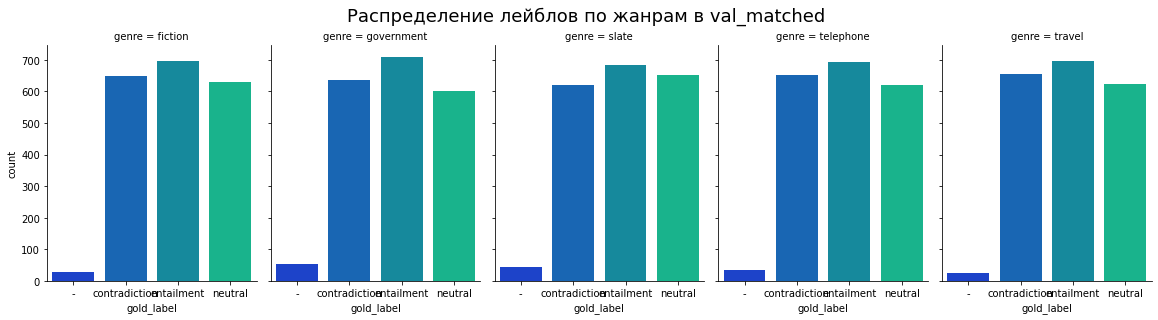

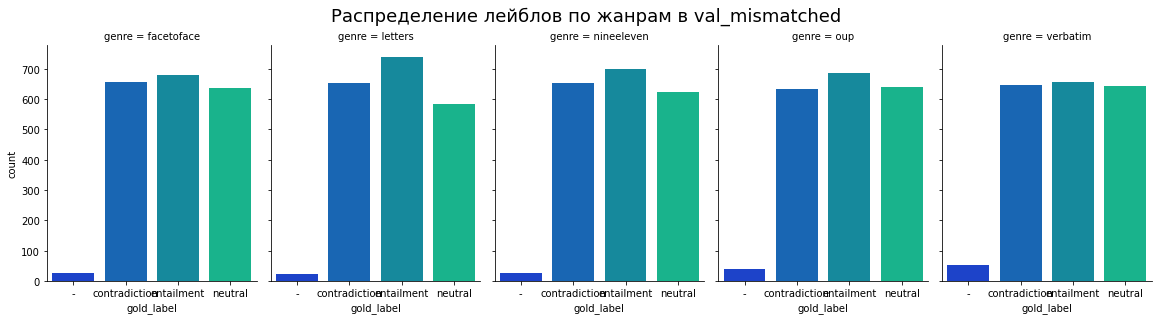

In [5]:
for data, data_name in zip([train, val_matched, val_mismatched], ['train', 'val_matched', 'val_mismatched']):
  gener_label_countplot(data, data_name)

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')


def sentense_len_distribution(data, data_name):

  data['s1_len'] = data['sentence1'].apply(lambda x: len(tokenizer.tokenize(x.lower())))
  data['s2_len'] = data['sentence2'].apply(lambda x: len(tokenizer.tokenize(x.lower())))

  sns.histplot(x = 's1_len', data=data, discrete =True, color='navy', label='Sentenses 1')
  sns.histplot(x = 's2_len', data=data, discrete =True, color='coral', label='Sentenses 2')

  plt.xlim(0,80)
  plt.xlabel('Длина предложения')
  plt.title(f'Распределение длины предложений в {data_name}')
  plt.legend()

  plt.show()

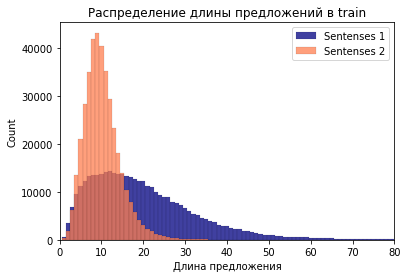

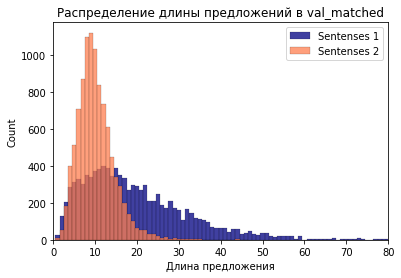

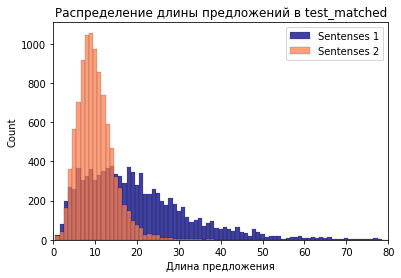

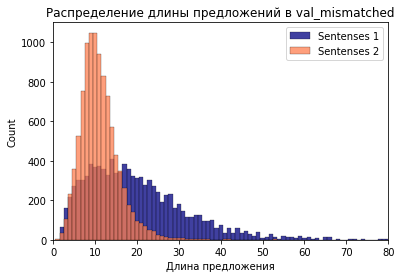

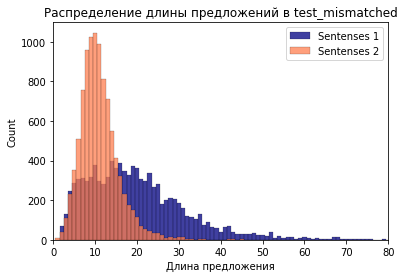

In [8]:
for data, data_name in full_data:
  sentense_len_distribution(data, data_name)

In [9]:
def genre_sentense_len_distribution(data, data_name):

  data['s1_len'] = data['sentence1'].apply(lambda x: len(tokenizer.tokenize(x.lower())))
  data['s2_len'] = data['sentence2'].apply(lambda x: len(tokenizer.tokenize(x.lower())))

  sns.histplot(x = 's1_len', hue='genre', data=data, discrete =True, label='Sentenses 1')
  sns.histplot(x = 's2_len', hue='genre', data=data, discrete =True, label='Sentenses 2')
  
  plt.xlim(0,80)
  plt.xlabel('Длина предложения')
  plt.title(f'Распределение длины предложений в {data_name}')
  plt.legend()

  plt.show()

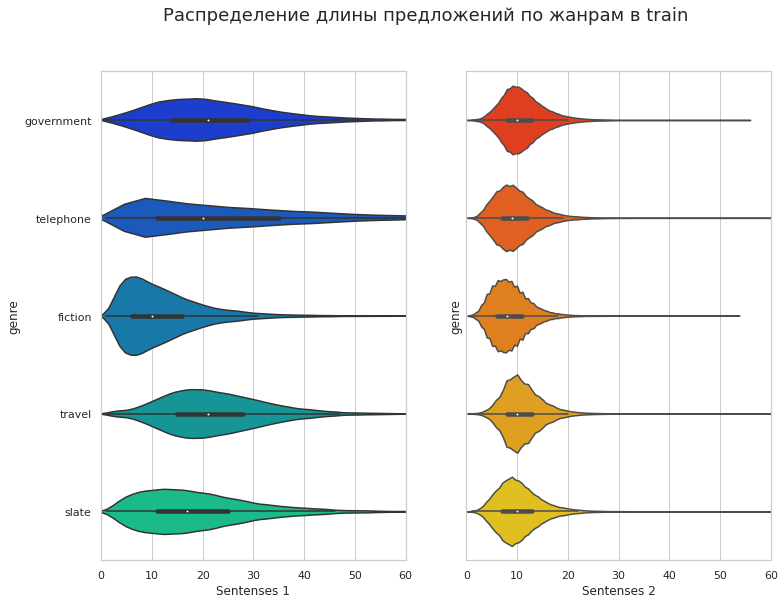

In [10]:
train['s1_len'] = train['sentence1'].apply(lambda x: len(tokenizer.tokenize(x.lower())))
train['s2_len'] = train['sentence2'].apply(lambda x: len(tokenizer.tokenize(x.lower())))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=train, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=train, palette="autumn", ax = axes[1])
axes[1].set_xlim(0, 60)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle('Распределение длины предложений по жанрам в train', fontsize=18)
plt.show()

In [11]:
#!pip install joypy

<Figure size 1280x800 with 0 Axes>

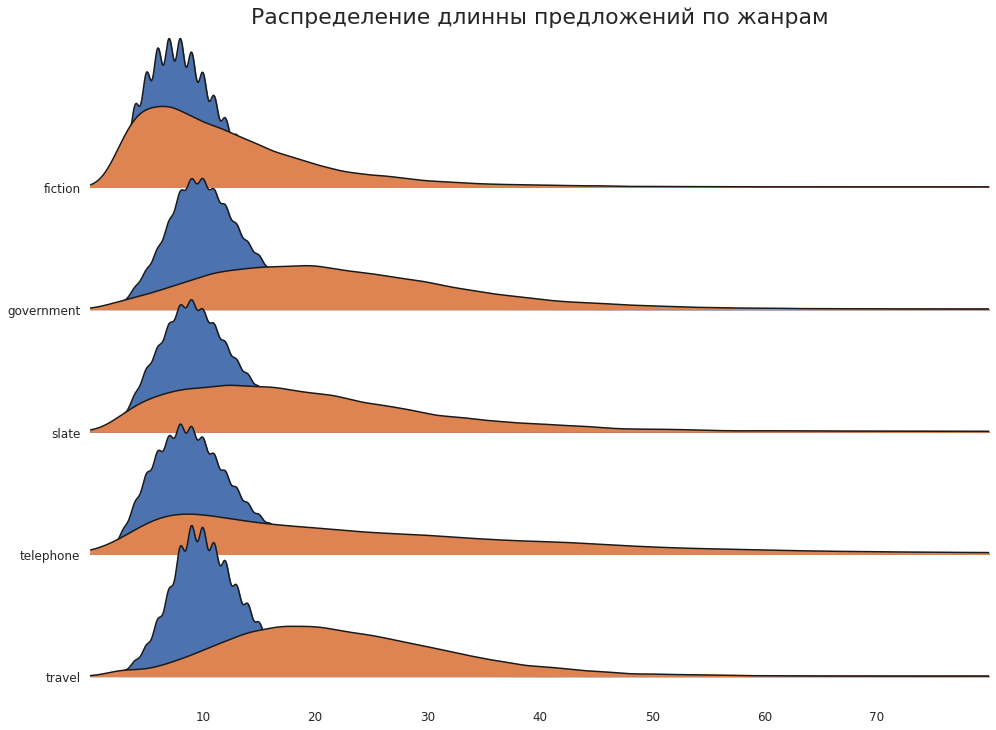

In [12]:
from joypy import joyplot

plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joyplot(train, column=['s2_len', 's1_len'], by="genre", figsize=(14,10), x_range=[0,80])

plt.title('Распределение длинны предложений по жанрам', fontsize=22)
plt.show()